# CURSO VISUALIZACIÓN DE LA INFORMACIÓN
## TRABAJO PRÁCTICO 1

### Ejercicio 4

Para el dataset incendios_forestales.csv diseñe una visualización estática y de una
sola página. Se debe entregar junto con la visualización un texto descriptivo (no más de
una carilla) con la siguiente información:

- a) Que se intenta transmitir
- b) Descripción y justificación del diseño elegido
- c) Si se realizó un filtrado de datos cual se realizó y porque
- d) Descripción de las herramientas utilizadas en el proceso.

## Dataset incendios_forestales 

### Lectura

In [1]:
import pandas as pd

data_forestal = pd.read_csv("incendios_forestales.csv", sep=";", decimal=',') 

data_forestal.head(10)

,pais_id,pais,provincia_id,provincia,departamento_id,departamento,sup_afectada,uni_med_id,cant_focos,año_inicial,"año_final,"
0,32,Argentina,6,Buenos Aires,833,Tres Arroyos,2400.0,ha,1,2014,2014.0
1,32,Argentina,14,Córdoba,14,Calamuchita,50.0,ha,1,2015,2015.0
2,32,Argentina,18,Corrientes,56,General Alvear,257.0,ha,1,2012,2012.0
3,32,Argentina,18,Corrientes,28,Concepción,130.0,ha,2,2012,2012.0
4,32,Argentina,18,Corrientes,28,Concepción,5.0,ha,1,2013,2013.0
5,32,Argentina,18,Corrientes,28,Concepción,146.0,ha,1,2015,2015.0
6,32,Argentina,18,Corrientes,70,Goya,30.0,ha,1,2012,2012.0
7,32,Argentina,18,Corrientes,84,Itizaingó,294.3,ha,3,2012,2012.0
8,32,Argentina,18,Corrientes,84,Ituzaingo,378.0,ha,1,2013,2013.0
9,32,Argentina,18,Corrientes,84,Ituzaingo,158.0,ha,3,2014,2014.0


In [3]:
data_forestal.tail(10)

,pais_id,pais,provincia_id,provincia,departamento_id,departamento,sup_afectada,uni_med_id,cant_focos,año_inicial,"año_final,"
110,32,Argentina,58,Neuquén,77,Minas,0.400,ha,4,2011,2012.0
111,32,Argentina,58,Neuquén,77,Minas,0.002,ha,1,2012,2013.0
112,32,Argentina,58,Neuquén,77,Minas,0.010,ha,1,2014,2015.0
113,32,Argentina,62,Río Negro,21,Bariloche,13.600,ha,101,2014,2015.0
114,32,Argentina,26,Chubut,56,Languiñeo,0.090,ha,2,2012,2013.0
115,32,Argentina,26,Chubut,98,Tehuelches,0.300,ha,1,2014,2015.0
116,32,Argentina,26,Chubut,98,Tehuelches,0.200,ha,1,2015,2016.0
117,32,Argentina,58,Neuquén,84,Ñorquin,240.800,ha,2,2011,2012.0
118,32,Argentina,58,Neuquén,84,Ñorquin,13.490,ha,2,2012,2013.0
119,32,Argentina,62,Río Negro,21,Bariloche,64.870,ha,84,2015,2016.0


### Resultados de la detección de datos repetidos, nulos y revisión de inconsistencias

In [4]:
print(data_forestal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pais_id          120 non-null    int64  
 1   pais             120 non-null    object 
 2   provincia_id     120 non-null    int64  
 3   provincia        120 non-null    object 
 4   departamento_id  120 non-null    int64  
 5   departamento     120 non-null    object 
 6   sup_afectada     118 non-null    float64
 7   uni_med_id       120 non-null    object 
 8   cant_focos       120 non-null    int64  
 9   año_inicial      120 non-null    int64  
 10  año_final,       120 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 10.4+ KB
None


In [5]:
# 1. Detección de datos repetidos
duplicated_data = data_forestal.duplicated().sum()
print(f"Se encontraron {duplicated_data} datos repetidos.")
# Revisar errores ortográficos o inconsistencias en columnas categóricas
unique_values = {col: data_forestal[col].unique() for col in data_forestal.columns}

# Resultado de la revisión inicial
unique_values

Se encontraron 0 datos repetidos.


{'pais_id': array([32], dtype=int64),
 'pais': array(['Argentina'], dtype=object),
 'provincia_id': array([ 6, 14, 18, 30, 38, 42, 50, 54, 70, 90, 26, 58, 62], dtype=int64),
 'provincia': array(['Buenos Aires', 'Córdoba', 'Corrientes', 'Entre Ríos', 'Jujuy',
        'La Pampa', 'Mendoza', 'Misiones', 'San Juan', 'Tucuman', 'Chubut',
        'Neuquén', 'Río Negro'], dtype=object),
 'departamento_id': array([833,  14,  56,  28,  70,  84, 112, 119, 126, 147, 154, 161, 168,
          8,  15,  35,  63,  21,  42,  98, 105,   7,  91,  49,  77],
       dtype=int64),
 'departamento': array(['Tres Arroyos', 'Calamuchita', 'General Alvear', 'Concepción',
        'Goya', 'Itizaingó', 'Ituzaingo', 'Monte Caseros',
        'Paso  de los Libres', 'Paso de los Libres', 'Saladas',
        'San Martín', 'San Miguel', 'San Roque', 'Santo Tomé', 'Colón',
        'Concordia', 'Federación', 'Federal', 'Islas del Ibicuy', 'La Paz',
        'Dr Manuel Belgrano', 'El Carmen', 'Ledesma', 'Palpalá',
        'San

In [6]:
num_dumplicados = 0
for column in data_forestal.columns:
    hay_duplicados = data_forestal[column].duplicated().any()
    if hay_duplicados:
        print(f"Hay duplicados en la columna {column}")
        num_dumplicados += 1
    else:
        print(f"No hay duplicados en la columna {column}")
if num_dumplicados == len(data_forestal.columns):
    print("¡En todas la columnas hay duplicados!")

Hay duplicados en la columna pais_id
Hay duplicados en la columna pais
Hay duplicados en la columna provincia_id
Hay duplicados en la columna provincia
Hay duplicados en la columna departamento_id
Hay duplicados en la columna departamento
Hay duplicados en la columna sup_afectada
Hay duplicados en la columna uni_med_id
Hay duplicados en la columna cant_focos
Hay duplicados en la columna año_inicial
Hay duplicados en la columna año_final,
¡En todas la columnas hay duplicados!


In [7]:
for column in data_forestal.columns:
    print(column)
    print(data_forestal[column].unique())

pais_id
[32]
pais
['Argentina']
provincia_id
[ 6 14 18 30 38 42 50 54 70 90 26 58 62]
provincia
['Buenos Aires' 'Córdoba' 'Corrientes' 'Entre Ríos' 'Jujuy' 'La Pampa'
 'Mendoza' 'Misiones' 'San Juan' 'Tucuman' 'Chubut' 'Neuquén' 'Río Negro']
departamento_id
[833  14  56  28  70  84 112 119 126 147 154 161 168   8  15  35  63  21
  42  98 105   7  91  49  77]
departamento
['Tres Arroyos' 'Calamuchita' 'General Alvear' 'Concepción' 'Goya'
 'Itizaingó' 'Ituzaingo' 'Monte Caseros' 'Paso  de los Libres'
 'Paso de los Libres' 'Saladas' 'San Martín' 'San Miguel' 'San Roque'
 'Santo Tomé' 'Colón' 'Concordia' 'Federación' 'Federal'
 'Islas del Ibicuy' 'La Paz' 'Dr Manuel Belgrano' 'El Carmen' 'Ledesma'
 'Palpalá' 'San Antonio' 'San Pedro' 'Santa Bárbara' 'Capital' 'Loventué'
 'San Rafael' '25 de Mayo' 'Apostoles' 'Apóstoles' 'Candelaria' 'Eldorado'
 'Guaraní' 'Iguazú' 'Leandro N Alem' 'Oberá' 'San Ignacio' 'San Javier'
 'Rivadavía' 'Cruz Alta' 'Lules' 'Tafí del Valle' 'Trancas' 'Cushamen'
 'Alu

Se observan columnas con datos unicos, estas son:
-   'pais_id'
-   'pais'
-   'uni_med_id'

Tambien se obsevan que la mayoria de los los años no duran mas de un año.
Y por ultimo existe un valor Nan.
Por lo que se procede aliminar las columnas señaladas y la columna 'año_final', y tambien se elimanara los registros con valores NaN.

In [8]:
print("No hay datos nulos" if not data_forestal.isna().any().any() else "Hay datos nulos")

Hay datos nulos


In [2]:
data_forestal.drop(['pais_id', 'pais','uni_med_id','año_final,'], axis=1, inplace=True)
data_forestal.dropna(inplace=True)

In [4]:
data_forestal.describe(include='all')

,provincia_id,provincia,departamento_id,departamento,sup_afectada,cant_focos,año_inicial
count,118.000000,118,118.000000,118,118.000000,118.000000,118.000000
unique,NaN,13,NaN,57,NaN,NaN,NaN
top,NaN,Corrientes,NaN,Concepción,NaN,NaN,NaN
freq,NaN,21,NaN,5,NaN,NaN,NaN
mean,40.406780,NaN,62.567797,NaN,121.004860,8.330508,2013.110169
std,16.979745,NaN,83.237122,NaN,323.246491,23.155755,1.279583
min,6.000000,NaN,7.000000,NaN,0.001500,0.000000,2011.000000
25%,26.000000,NaN,21.000000,NaN,2.565000,1.000000,2012.000000
50%,38.000000,NaN,45.500000,NaN,12.975000,1.000000,2013.000000
75%,54.000000,NaN,84.000000,NaN,93.750000,4.000000,2014.000000


In [18]:
data_forestal.head()

,provincia_id,provincia,departamento_id,departamento,sup_afectada,cant_focos,año_inicial
0,6,Buenos Aires,833,Tres Arroyos,2400.0,1,2014
1,14,Córdoba,14,Calamuchita,50.0,1,2015
2,18,Corrientes,56,General Alvear,257.0,1,2012
3,18,Corrientes,28,Concepción,130.0,2,2012
4,18,Corrientes,28,Concepción,5.0,1,2013


In [19]:
data_forestal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 0 to 119
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   provincia_id     118 non-null    int64  
 1   provincia        118 non-null    object 
 2   departamento_id  118 non-null    int64  
 3   departamento     118 non-null    object 
 4   sup_afectada     118 non-null    float64
 5   cant_focos       118 non-null    int64  
 6   año_inicial      118 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 7.4+ KB


- Datos duplicados:
    - Hay 0 filas duplicadas en el conjunto de datos.
    - En todas las columnas se hallaron datos duplicados.
- Hubo un valor nulo.

- Variables Numéricas
    - sup_afectada
    - cant_focos
    - año_inicial
- Variables Categóricas
    - provincia_id
    - provincia
    - departamento_id
    - departamento


Vamos a proceder con las verificaciones de univocidad para provincia_id a provincia y departamento_id a departamento.


In [20]:
# Verificar univocidad de provincia_id a provincia
provincia_univoca = data_forestal.groupby('provincia_id')['provincia'].nunique()

# Verificar univocidad de departamento_id a departamento
departamento_univoco = data_forestal.groupby('departamento_id')['departamento'].nunique()

# Mostrar los resultados que no son univocos
provincia_no_univoca = provincia_univoca[provincia_univoca > 1]
departamento_no_univoco = departamento_univoco[departamento_univoco > 1]

provincia_no_univoca, departamento_no_univoco


(Series([], Name: provincia, dtype: int64),
 departamento_id
 7      3
 14     4
 21     4
 28     3
 35     4
 42     2
 56     5
 63     5
 70     5
 84     4
 98     4
 105    2
 119    3
 Name: departamento, dtype: int64)

Analizando la univocidad para provincia_id a provincia y departamento_id a departamento,
los resultados muestran que:

provincia_id a provincia es unívoco, ya que no hay ningún provincia_id que se corresponda con más de una provincia.

departamento_id a departamento no es unívoco, ya que hay varios departamento_id que se corresponden con más de un departamento. Abahi se detalla los departamento_id problemáticos y la cantidad de departamento únicos asociados a cada uno:

- departamento_id 7: 3 departamentos
- departamento_id 14: 5 departamentos
- departamento_id 21: 4 departamentos
- departamento_id 28: 3 departamentos
- departamento_id 35: 4 departamentos
- departamento_id 42: 2 departamentos
- departamento_id 56: 5 departamentos
- departamento_id 63: 5 departamentos
- departamento_id 70: 5 departamentos
- departamento_id 84: 4 departamentos
- departamento_id 98: 4 departamentos
- departamento_id 105: 2 departamentos
- departamento_id 112: 2 departamentos
- departamento_id 119: 3 departamentos

Esto indica que hay inconsistencias en los nombres de los departamentos asociados a ciertos departamento_id.

Probablemente la inconsistencia se da porque cada provincia usa los mismos id para sus propios departamentos.

### Identificación y visualización de outliers para los datos numéricos.

C:\Users\dpenaloza\AppData\Local\Temp\ipykernel_16528\1901843944.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


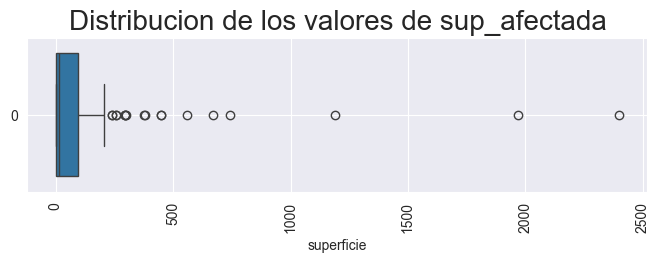

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Definir la función de formato para el eje y
def formato_millones(x, pos):
    return '{:,.0f}'.format(x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 2))
sns.set_style("darkgrid")

sns.boxplot(
    x       = 'sup_afectada',
    data    = data_forestal,
    palette = 'tab20',
    ax      = ax,
    legend=False
)
ax.set_title('Distribucion de los valores de sup_afectada', fontsize=20)
ax.set_xlabel('superficie')
plt.xticks(rotation=90)
plt.grid(True)
# Aplicar el formato al eje y
ax.yaxis.set_major_formatter(mtick.FuncFormatter(formato_millones))

In [24]:
# Continuar con la identificación de outliers en 'date_timestamp'
Q1 = data_forestal['sup_afectada'].quantile(0.25)
print(f'Q1={Q1}')
Q3 = data_forestal['sup_afectada'].quantile(0.75)
print(f'Q3={Q3}')
IQR = Q3 - Q1

# Identificar límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = data_forestal[(data_forestal['sup_afectada'] < lower_bound) | (data_forestal['sup_afectada'] > upper_bound)].sup_afectada

# Mostrar resultados
outliers_summary = outliers.describe()

outliers_summary


Q1=2.565
Q3=93.75


count      18.000000
mean      631.758333
std       617.212810
min       240.800000
25%       294.350000
50%       379.000000
75%       643.600000
max      2400.000000
Name: sup_afectada, dtype: float64

Se encontraron 18 outliers, hay que tener en cuanta que hay 119 registros.

C:\Users\dpenaloza\AppData\Local\Temp\ipykernel_16528\1358219317.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


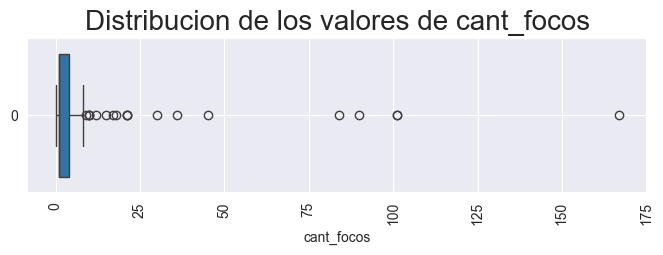

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Definir la función de formato para el eje y
def formato_millones(x, pos):
    return '{:,.0f}'.format(x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 2))
sns.set_style("darkgrid")

sns.boxplot(
    x       = 'cant_focos',
    data    = data_forestal,
    palette = 'tab20',
    ax      = ax,
    legend=False
)
ax.set_title('Distribucion de los valores de cant_focos', fontsize=20)
ax.set_xlabel('cant_focos')
plt.xticks(rotation=90)
plt.grid(True)
# Aplicar el formato al eje y
ax.yaxis.set_major_formatter(mtick.FuncFormatter(formato_millones))

In [29]:
# Continuar con la identificación de outliers en 'date_timestamp'
Q1 = data_forestal['cant_focos'].quantile(0.25)
print(f'Q1={Q1}')
Q3 = data_forestal['cant_focos'].quantile(0.75)
print(f'Q3={Q3}')
IQR = Q3 - Q1

# Identificar límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = data_forestal[(data_forestal['cant_focos'] < lower_bound) | (data_forestal['cant_focos'] > upper_bound)].cant_focos

# Mostrar resultados
outliers_summary = outliers.describe()

outliers_summary

Q1=1.0
Q3=4.0


count     19.000000
mean      43.052632
std       44.182040
min        9.000000
25%       13.500000
50%       21.000000
75%       64.500000
max      167.000000
Name: cant_focos, dtype: float64

Se encontraron 19 outliers, hay que tener en cuanta que hay 119 registros.

C:\Users\dpenaloza\AppData\Local\Temp\ipykernel_16528\3795906257.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


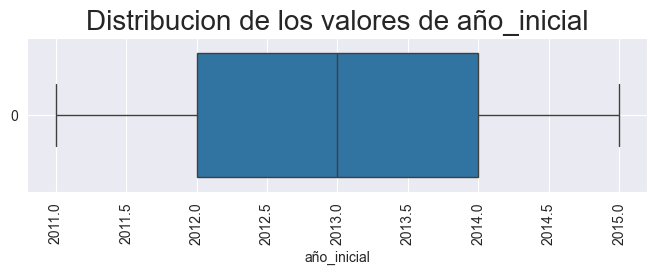

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Definir la función de formato para el eje y
def formato_millones(x, pos):
    return '{:,.0f}'.format(x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 2))
sns.set_style("darkgrid")

sns.boxplot(
    x       = 'año_inicial',
    data    = data_forestal,
    palette = 'tab20',
    ax      = ax,
    legend=False
)
ax.set_title('Distribucion de los valores de año_inicial', fontsize=20)
ax.set_xlabel('año_inicial')
plt.xticks(rotation=90)
plt.grid(True)
# Aplicar el formato al eje y
ax.yaxis.set_major_formatter(mtick.FuncFormatter(formato_millones))

In [31]:
# Continuar con la identificación de outliers en 'date_timestamp'
Q1 = data_forestal['año_inicial'].quantile(0.25)
print(f'Q1={Q1}')
Q3 = data_forestal['año_inicial'].quantile(0.75)
print(f'Q3={Q3}')
IQR = Q3 - Q1

# Identificar límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = data_forestal[(data_forestal['año_inicial'] < lower_bound) | (data_forestal['año_inicial'] > upper_bound)].año_inicial

# Mostrar resultados
outliers_summary = outliers.describe()

outliers_summary

Q1=2012.0
Q3=2014.0


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: año_inicial, dtype: float64

No se encontraron datos atipicos.

### Análisis Estadístico Descriptivo

In [32]:
# Análisis estadístico descriptivo de las variables relevantes
statistical_summary = data_forestal.describe(include='all')

# Mostrar análisis estadístico completo
#import ace_tools as tools; tools.display_dataframe_to_user(name="Resumen Estadístico de los Datos", dataframe=statistical_summary)

statistical_summary


,provincia_id,provincia,departamento_id,departamento,sup_afectada,cant_focos,año_inicial
count,118.000000,118,118.000000,118,118.000000,118.000000,118.000000
unique,NaN,13,NaN,57,NaN,NaN,NaN
top,NaN,Corrientes,NaN,Concepción,NaN,NaN,NaN
freq,NaN,21,NaN,5,NaN,NaN,NaN
mean,40.406780,NaN,62.567797,NaN,121.004860,8.330508,2013.110169
std,16.979745,NaN,83.237122,NaN,323.246491,23.155755,1.279583
min,6.000000,NaN,7.000000,NaN,0.001500,0.000000,2011.000000
25%,26.000000,NaN,21.000000,NaN,2.565000,1.000000,2012.000000
50%,38.000000,NaN,45.500000,NaN,12.975000,1.000000,2013.000000
75%,54.000000,NaN,84.000000,NaN,93.750000,4.000000,2014.000000


Se observan datos extraños en provincia_id y departamento_id, ya que no se estan tomando como datos categoricos, sino como cantidades.

In [3]:
data_forestal['provincia_id'] = data_forestal['provincia_id'].astype(str)
data_forestal['departamento_id'] = data_forestal['departamento_id'].astype(str)

data_forestal.describe(include='all')

,provincia_id,provincia,departamento_id,departamento,sup_afectada,cant_focos,año_inicial
count,118,118,118,118,118.000000,118.000000,118.000000
unique,13,13,25,57,NaN,NaN,NaN
top,18,Corrientes,21,Concepción,NaN,NaN,NaN
freq,21,21,14,5,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,121.004860,8.330508,2013.110169
std,NaN,NaN,NaN,NaN,323.246491,23.155755,1.279583
min,NaN,NaN,NaN,NaN,0.001500,0.000000,2011.000000
25%,NaN,NaN,NaN,NaN,2.565000,1.000000,2012.000000
50%,NaN,NaN,NaN,NaN,12.975000,1.000000,2013.000000
75%,NaN,NaN,NaN,NaN,93.750000,4.000000,2014.000000


El resumen estadístico proporciona información valiosa sobre las columnas del dataset:

- provincia_id y provincia: se corresponden univocamente, son 13 y las mas frecuente es Corrientes con 21 ocurrencias 
- departamento_id y departamento: no se corresponden univocamente (dado que cada provincia usa las mismas id para sus departamentos) La id mas empleada es 21 y el dapartmento mas frecuente es Concepción.
- sup_afectada:
    - Media: 121 ha.
    - Rango: 0.0015 a 2400 ha
- cant_focos:
    - Media: 8
    - Rango: 0 a 167
- Año_inicial:
    - Media:    2013
    - Rango: 2011 al 2015 

### Distribución de los Datos

In [70]:
data_forestal

,provincia_id,provincia,departamento_id,departamento,sup_afectada,cant_focos,año_inicial
0,6,Buenos Aires,833,Tres Arroyos,2400.00,1,2014
1,14,Córdoba,14,Calamuchita,50.00,1,2015
2,18,Corrientes,56,General Alvear,257.00,1,2012
3,18,Corrientes,28,Concepción,130.00,2,2012
4,18,Corrientes,28,Concepción,5.00,1,2013
...,...,...,...,...,...,...,...
115,26,Chubut,98,Tehuelches,0.30,1,2014
116,26,Chubut,98,Tehuelches,0.20,1,2015
117,58,Neuquén,84,Ñorquin,240.80,2,2011
118,58,Neuquén,84,Ñorquin,13.49,2,2012


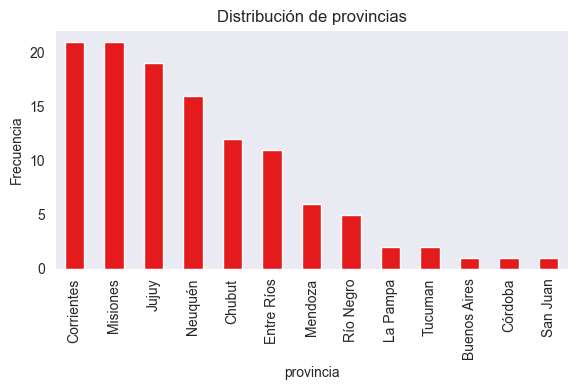

{'provincia': provincia
 Corrientes      21
 Misiones        21
 Jujuy           19
 Neuquén         16
 Chubut          12
 Entre Ríos      11
 Mendoza          6
 Río Negro        5
 La Pampa         2
 Tucuman          2
 Buenos Aires     1
 Córdoba          1
 San Juan         1
 Name: count, dtype: int64}

In [37]:
import matplotlib.pyplot as plt

# Distribución de variables categóricas
categorical_columns = ['provincia']
categorical_distribution = {col: data_forestal[col].value_counts() for col in categorical_columns}


# Visualización de las distribuciones categóricas
fig, ax = plt.subplots(1, 1, figsize=(6, 4))


data_forestal['provincia'].value_counts().plot(kind='bar', ax=ax, cmap='Set1')
ax.set_title(f'Distribución de provincias')
ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.grid()
plt.show()

# Mostrar las descripciones numéricas y categóricas
categorical_distribution



Estadísticas de las Variable Categórica:
- Privincia:
    - Corrientes      21
    - Misiones        21
    - Jujuy           19
    - Neuquén         16
    - Chubut          12
    - Entre Ríos      11
    - Mendoza          6
    - Río Negro        5
    - La Pampa         2
    - Tucuman          2
    - Buenos Aires     1
    - Córdoba          1
    - San Juan         1

In [6]:
data_provincia = pd.DataFrame(categorical_distribution)
data_provincia.rename(columns={'provincia': 'count'}, inplace=True)
data_provincia.reset_index()

NameError: name 'categorical_distribution' is not defined

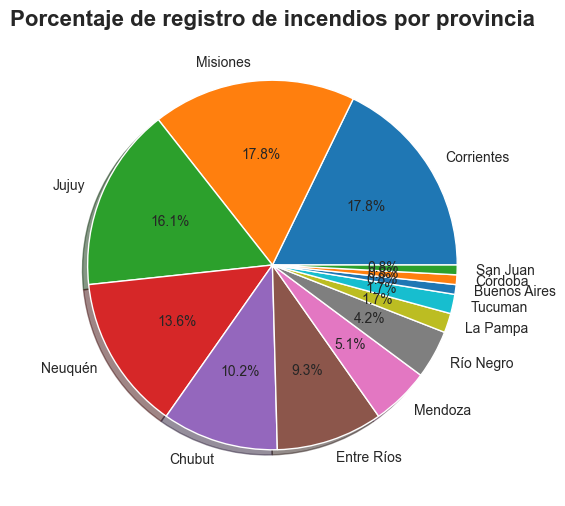

In [43]:
from matplotlib import pyplot as plt

# Asegúrate de que `data_company` es el DataFrame correcto y contiene la columna 'count'
#data_company = data_company.reset_index()

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus necesidades
wedges, texts, autotexts = ax.pie(
    data_provincia['count'],  # Asegúrate de usar la columna 'count' del DataFrame
    labels=data_provincia.index,  # Asegúrate de usar la columna 'Company Name' del DataFrame
    autopct='%1.1f%%', 
    shadow=True
)

#ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Porcentaje de registro de incendios por provincia", fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Mostrar el gráfico
plt.show()


Las gráficas muestran la distribución de las variables categóricas:

- Esto muestra que Corrientes y Misiones son las provincias con mayor cantida de incendios.

In [44]:

# Contar el número de registros de incendios por provincia
provincia_counts = data_forestal['provincia'].value_counts().head(5)

# Mostrar las 5 provincias con mayor cantidad de registros de incendios
print("Top 5 provincias con mayor cantidad de registros de incendios:")
print(provincia_counts)

# Para cada una de las provincias en el top 5, contar el número de registros por departamento
top_provincias = provincia_counts.index
resultados = {}

for provincia in top_provincias:
    departamentos_counts = data_forestal[data_forestal['provincia'] == provincia]['departamento'].value_counts()
    resultados[provincia] = departamentos_counts

# Mostrar los resultados detallados por departamento
print("\nDesglose por departamento para cada una de estas provincias:")
for provincia, counts in resultados.items():
    print(f"\nProvincia: {provincia}")
    print(counts)


Top 5 provincias con mayor cantidad de registros de incendios:
provincia
Corrientes    21
Misiones      21
Jujuy         19
Neuquén       16
Chubut        12
Name: count, dtype: int64

Desglose por departamento para cada una de estas provincias:

Provincia: Corrientes
departamento
Santo Tomé             4
Concepción             3
Ituzaingo              2
Monte Caseros          2
San Miguel             2
General Alvear         1
Goya                   1
Itizaingó              1
Paso  de los Libres    1
Paso de los Libres     1
Saladas                1
San Martín             1
San Roque              1
Name: count, dtype: int64

Provincia: Misiones
departamento
Candelaria        4
Apóstoles         3
Capital           2
Concepción        2
Leandro N Alem    2
25 de Mayo        1
Apostoles         1
Eldorado          1
Guaraní           1
Iguazú            1
Oberá             1
San Ignacio       1
San Javier        1
Name: count, dtype: int64

Provincia: Jujuy
departamento
Dr Manuel Belgra

C:\Users\dpenaloza\AppData\Local\Temp\ipykernel_16528\933399779.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=provincia_counts.values, y=provincia_counts.index, palette='tab20')


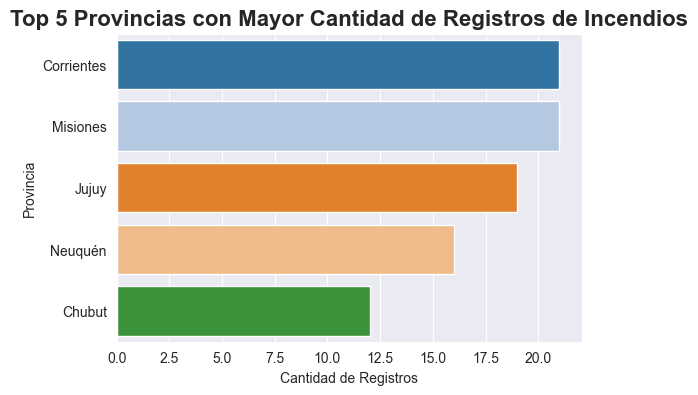

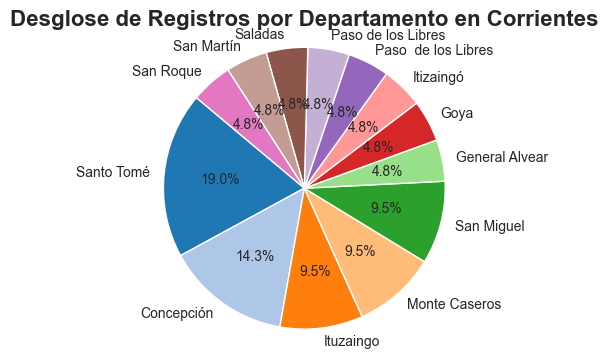

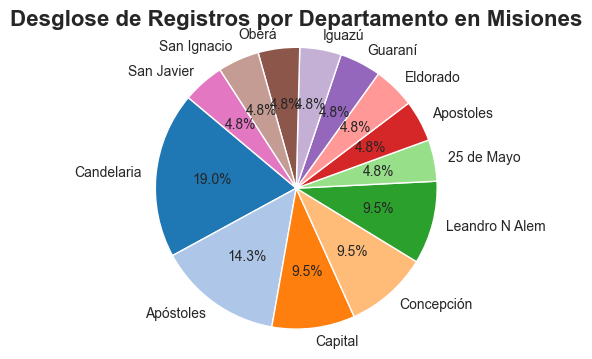

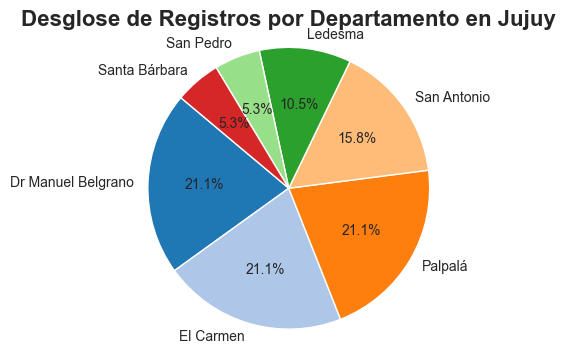

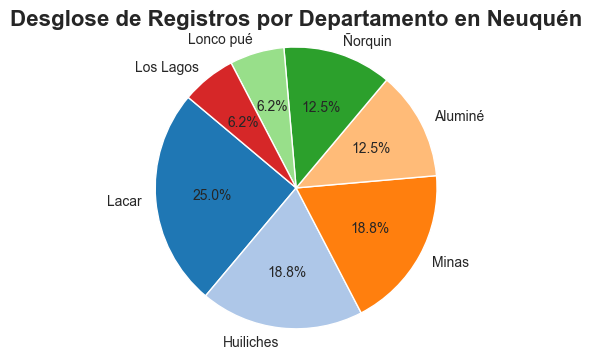

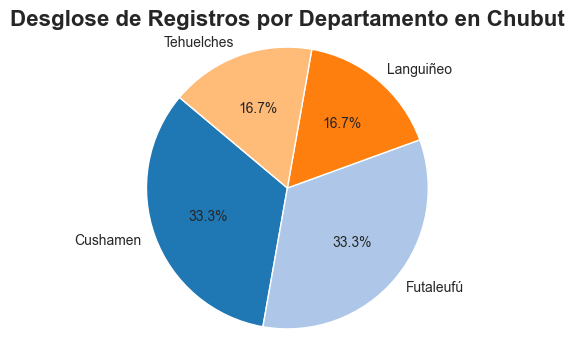

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Contar el número de registros de incendios por provincia
provincia_counts = data_forestal['provincia'].value_counts().head(5)

# Crear un DataFrame para los gráficos
top_provincias = provincia_counts.index
data_top_provincias = data_forestal[data_forestal['provincia'].isin(top_provincias)]

# Gráfico de Barras para el Top 5 de Provincias
plt.figure(figsize=(6, 4))
sns.barplot(x=provincia_counts.values, y=provincia_counts.index, palette='tab20')
plt.title('Top 5 Provincias con Mayor Cantidad de Registros de Incendios', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Cantidad de Registros')
plt.ylabel('Provincia')
plt.show()

for provincia in top_provincias:
    departamentos_counts = data_top_provincias[data_top_provincias['provincia'] == provincia]['departamento'].value_counts()
    
    plt.figure(figsize=(4, 4))
    plt.pie(departamentos_counts, labels=departamentos_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors[:len(departamentos_counts)])
    plt.title(f'Desglose de Registros por Departamento en {provincia}', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


C:\Users\dpenaloza\AppData\Local\Temp\ipykernel_16528\1229379761.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=provincia_focos.values, y=provincia_focos.index, palette='tab20')


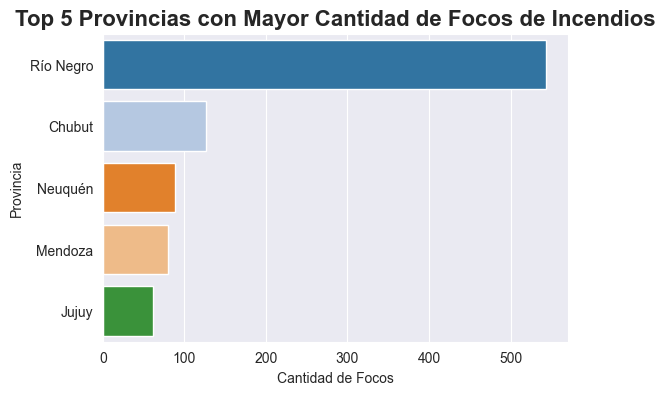

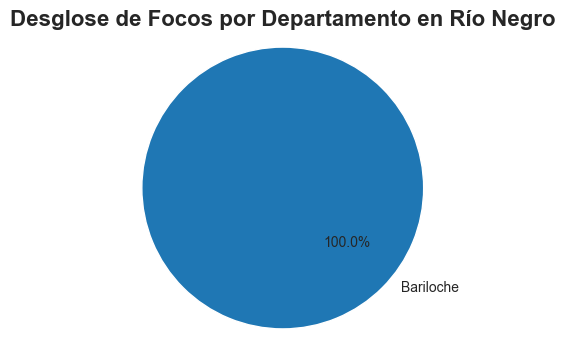

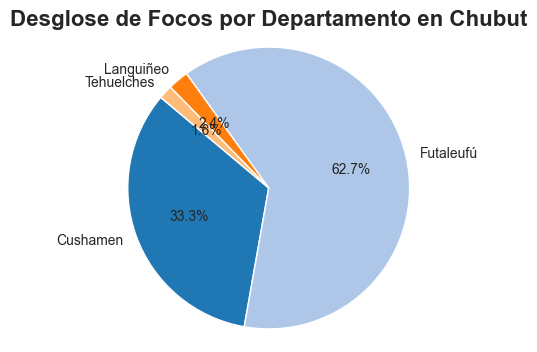

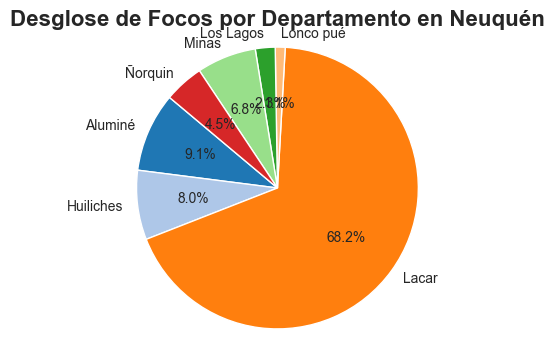

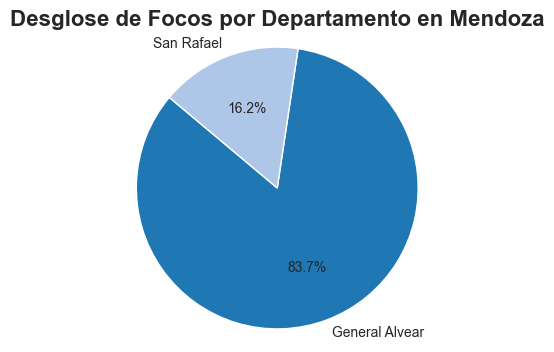

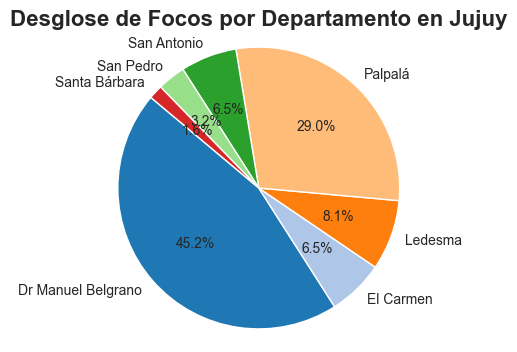

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sumar el total de focos por provincia
provincia_focos = data_forestal.groupby('provincia')['cant_focos'].sum().sort_values(ascending=False).head(5)

# Crear un DataFrame para los gráficos
top_provincias = provincia_focos.index
data_top_provincias = data_forestal[data_forestal['provincia'].isin(top_provincias)]

# Gráfico de Barras para el Top 5 de Provincias por cantidad de focos
plt.figure(figsize=(6, 4))
sns.barplot(x=provincia_focos.values, y=provincia_focos.index, palette='tab20')
plt.title('Top 5 Provincias con Mayor Cantidad de Focos de Incendios', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Cantidad de Focos')
plt.ylabel('Provincia')
plt.show()

# Gráficos de Torta para el Desglose de Focos por Departamento
for provincia in top_provincias:
    departamentos_focos = data_top_provincias[data_top_provincias['provincia'] == provincia].groupby('departamento')['cant_focos'].sum()
    
    plt.figure(figsize=(4, 4))
    plt.pie(departamentos_focos, labels=departamentos_focos.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors[:len(departamentos_focos)])
    plt.title(f'Desglose de Focos por Departamento en {provincia}', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


Se observa que hay registros con valor de foco igual a cero, suponiendo que hace referencia a un origen del incendio que no fue en el departamento. A fin de tener en cuenta la superficie afectada en función de los focos, creo conveniente de contabilizar como 1 a los focos en los departamento donde haya habido un registro de incendio

In [4]:

# Reemplazar los valores de 'cant_focos' igual a 0 por 1
data_forestal.loc[data_forestal['cant_focos'] == 0, 'cant_focos'] = 1

# Verificar los cambios mostrando algunas filas donde cant_focos es 1
data_forestal

,provincia_id,provincia,departamento_id,departamento,sup_afectada,cant_focos,año_inicial
0,6,Buenos Aires,833,Tres Arroyos,2400.00,1,2014
1,14,Córdoba,14,Calamuchita,50.00,1,2015
2,18,Corrientes,56,General Alvear,257.00,1,2012
3,18,Corrientes,28,Concepción,130.00,2,2012
4,18,Corrientes,28,Concepción,5.00,1,2013
...,...,...,...,...,...,...,...
115,26,Chubut,98,Tehuelches,0.30,1,2014
116,26,Chubut,98,Tehuelches,0.20,1,2015
117,58,Neuquén,84,Ñorquin,240.80,2,2011
118,58,Neuquén,84,Ñorquin,13.49,2,2012


C:\Users\dpenaloza\AppData\Local\Temp\ipykernel_16528\1229379761.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=provincia_focos.values, y=provincia_focos.index, palette='tab20')


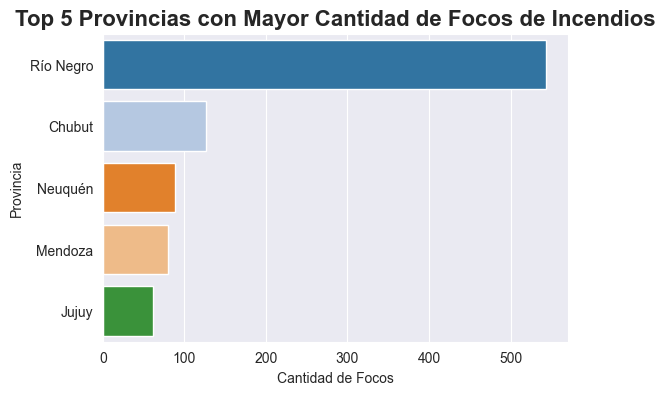

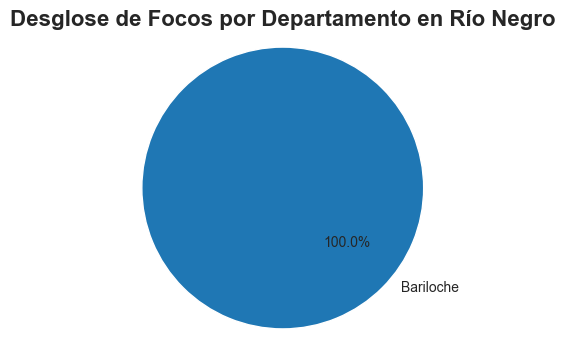

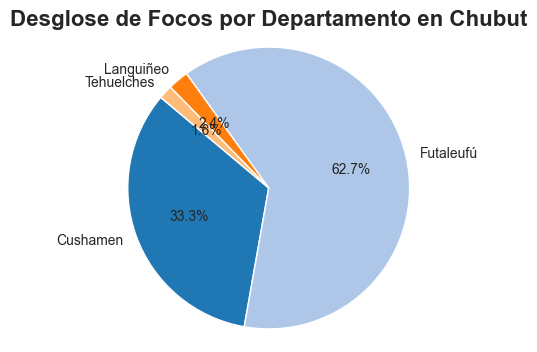

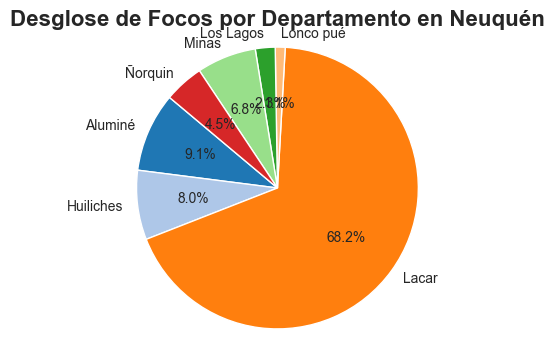

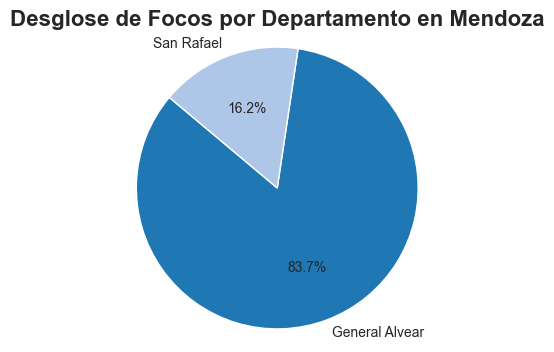

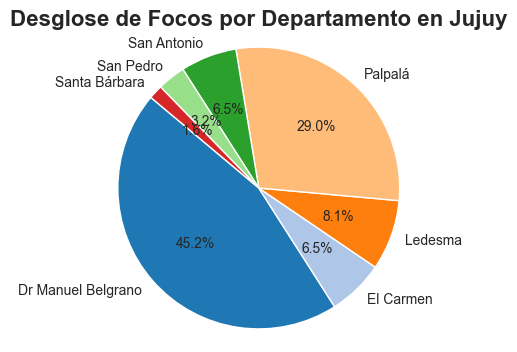

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sumar el total de focos por provincia
provincia_focos = data_forestal.groupby('provincia')['cant_focos'].sum().sort_values(ascending=False).head(5)

# Crear un DataFrame para los gráficos
top_provincias = provincia_focos.index
data_top_provincias = data_forestal[data_forestal['provincia'].isin(top_provincias)]

# Gráfico de Barras para el Top 5 de Provincias por cantidad de focos
plt.figure(figsize=(6, 4))
sns.barplot(x=provincia_focos.values, y=provincia_focos.index, palette='tab20')
plt.title('Top 5 Provincias con Mayor Cantidad de Focos de Incendios', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Cantidad de Focos')
plt.ylabel('Provincia')
plt.show()

# Gráficos de Torta para el Desglose de Focos por Departamento
for provincia in top_provincias:
    departamentos_focos = data_top_provincias[data_top_provincias['provincia'] == provincia].groupby('departamento')['cant_focos'].sum()
    
    plt.figure(figsize=(4, 4))
    plt.pie(departamentos_focos, labels=departamentos_focos.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors[:len(departamentos_focos)])
    plt.title(f'Desglose de Focos por Departamento en {provincia}', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


C:\Users\dpenaloza\AppData\Local\Temp\ipykernel_1708\2670856570.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=provincia_sup_afectada.values, y=provincia_sup_afectada.index, palette='tab20')


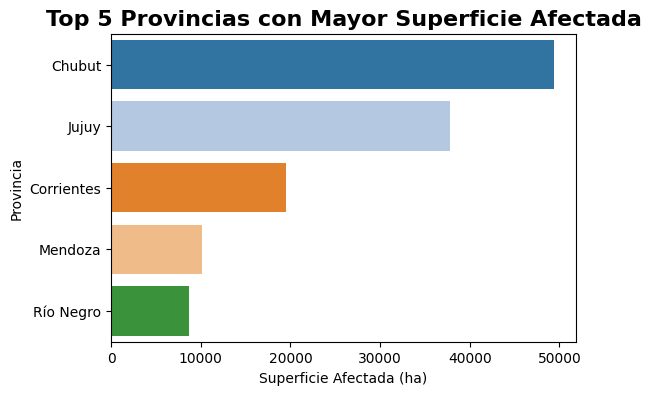

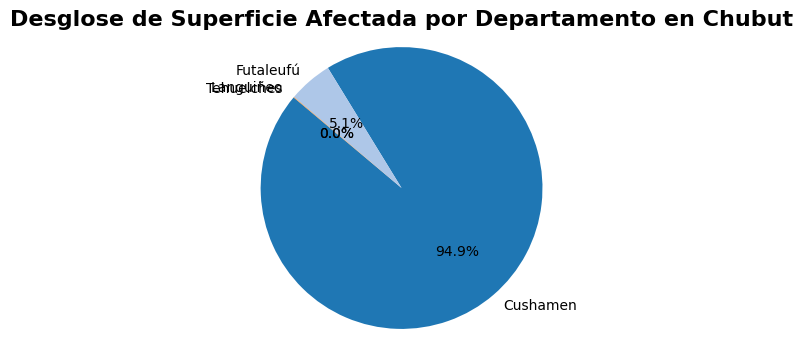

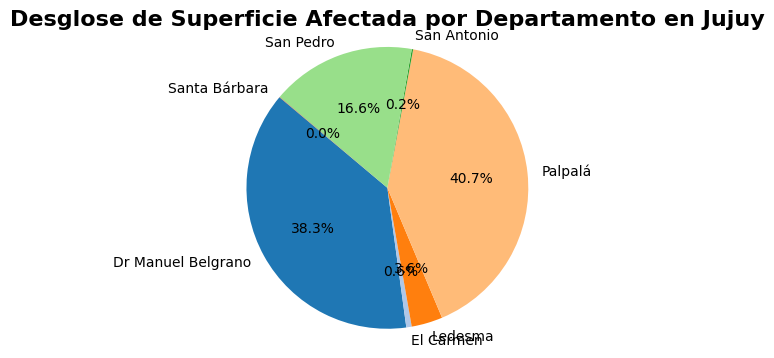

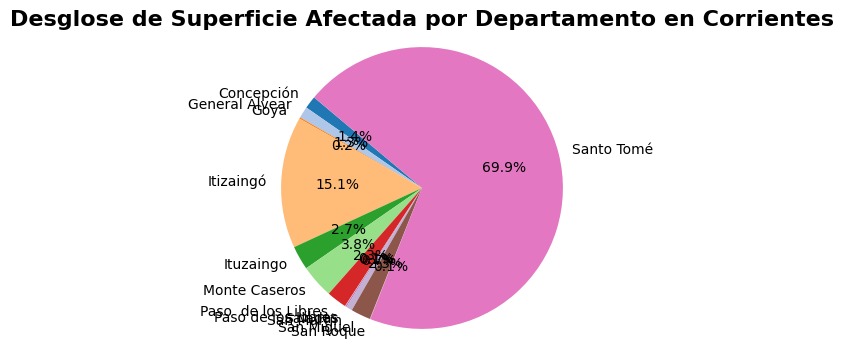

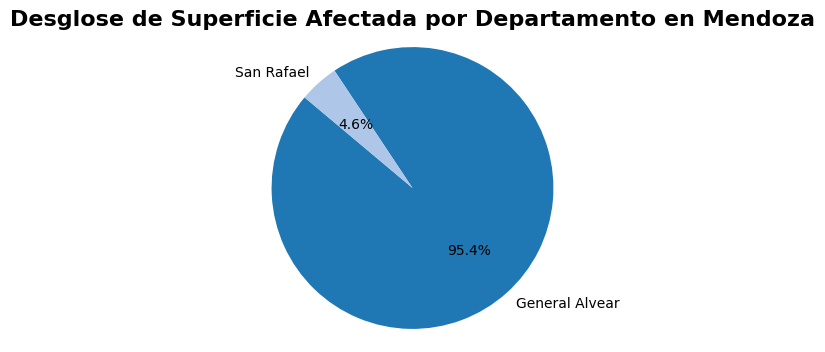

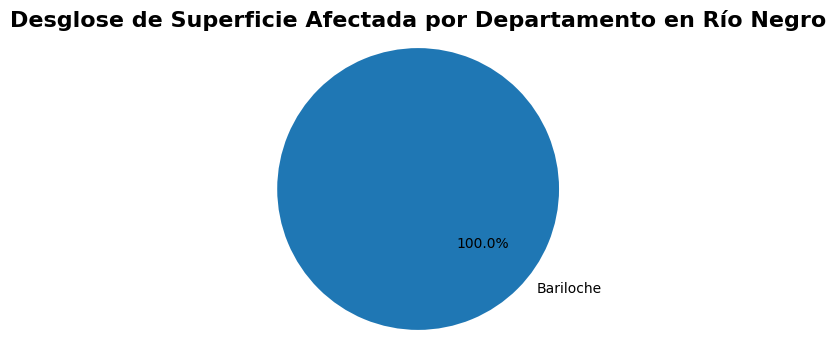

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna 'sup_afectada' a numérico, eliminando cualquier carácter no numérico
#data_forestal['sup_afectada'] = data_forestal['sup_afectada'].str.replace(',', '.').astype(float)

# Sumar la superficie afectada total por provincia
provincia_sup_afectada = data_forestal.groupby('provincia')['sup_afectada'].sum().sort_values(ascending=False).head(5)

# Crear un DataFrame para los gráficos
top_provincias = provincia_sup_afectada.index
data_top_provincias = data_forestal[data_forestal['provincia'].isin(top_provincias)]

# Gráfico de Barras para el Top 5 de Provincias por superficie afectada
plt.figure(figsize=(6, 4))
sns.barplot(x=provincia_sup_afectada.values, y=provincia_sup_afectada.index, palette='tab20')
plt.title('Top 5 Provincias con Mayor Superficie Afectada', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Superficie Afectada (ha)')
plt.ylabel('Provincia')
plt.show()

# Gráficos de Torta para el Desglose de Superficie Afectada por Departamento
for provincia in top_provincias:
    departamentos_sup_afectada = data_top_provincias[data_top_provincias['provincia'] == provincia].groupby('departamento')['sup_afectada'].sum()
    
    plt.figure(figsize=(4, 4))
    plt.pie(departamentos_sup_afectada, labels=departamentos_sup_afectada.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors[:len(departamentos_sup_afectada)])
    plt.title(f'Desglose de Superficie Afectada por Departamento en {provincia}', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


### Visualización

Vamos a generar visualizaciones adicionales para identificar patrones y tendencias en los datos, como la evolución de la cantidad de las transacciones  a lo largo del  año y la distribución del monto total de las transaccion por compañia.

In [1]:
import pandas as pd

data_forestal = pd.read_csv("incendios_forestales.csv", sep=";", decimal=',')
data_forestal.drop(['pais_id', 'pais','uni_med_id','año_final,'], axis=1, inplace=True)
data_forestal.dropna(inplace=True)
data_forestal['provincia_id'] = data_forestal['provincia_id'].astype(str)
data_forestal['departamento_id'] = data_forestal['departamento_id'].astype(str)
data_forestal.loc[data_forestal['cant_focos'] == 0, 'cant_focos'] = 1

In [8]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Cargar el dataset
file_path = 'incendios_forestales.csv'
data_forestal = pd.read_csv(file_path, delimiter=';', dtype={'provincia_id': str, 'departamento_id': str})

data_forestal.drop(['pais_id', 'pais','uni_med_id','año_final,'], axis=1, inplace=True)
data_forestal.dropna(inplace=True)
data_forestal['provincia_id'] = data_forestal['provincia_id'].astype(str)
data_forestal['departamento_id'] = data_forestal['departamento_id'].astype(str)
# Convertir la columna 'sup_afectada' a numérico
data_forestal['sup_afectada'] = data_forestal['sup_afectada'].str.replace(',', '').astype(float)
# Reemplazar los valores de 'cant_focos' igual a 0 por 1
data_forestal.loc[data_forestal['cant_focos'] == 0, 'cant_focos'] = 1

# Agrupar los datos por provincia
provincia_data = data_forestal.groupby('provincia').agg({
    'cant_focos': 'sum',
    'sup_afectada': 'sum'
}).reset_index()

# Obtener coordenadas de las provincias
geolocator = Nominatim(user_agent="geoapiExercises")
locations = {}

for provincia in provincia_data['provincia']:
    location = geolocator.geocode(f"{provincia}, Argentina")
    if location:
        locations[provincia] = [location.latitude, location.longitude]

# Añadir coordenadas a los datos
provincia_data['coordinates'] = provincia_data['provincia'].map(locations)
provincia_data = provincia_data.dropna(subset=['coordinates'])

# Crear el mapa base
m = folium.Map(location=[-38.4161, -63.6167], zoom_start=5, tiles='OpenStreetMap', attr='© OpenStreetMap contributors')

# Añadir marcadores al mapa con etiquetas
for _, row in provincia_data.iterrows():
    lat, lon = row['coordinates']
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=row['cant_focos'] / 10,  # Ajustar el tamaño según la cantidad de focos
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['provincia']}: {row['cant_focos']} Focos"
    ).add_to(m)
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=row['sup_afectada'] / 1000,  # Ajustar el tamaño según la superficie afectada
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"{row['provincia']}: {row['sup_afectada']} ha afectadas"
    ).add_to(m)
    
    # Agregar etiquetas
    folium.Marker(
        location=[lat, lon],
        icon=folium.DivIcon(html=f'<div style="font-size: 12px; color: white;">{row["provincia"]}</div>')
    ).add_to(m)

# Añadir una leyenda personalizada
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 250px; height: 90px; 
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; border-radius:6px; padding: 10px;">
     <i class="fa fa-circle" style="color:blue"></i> Focos <br>
     <i class="fa fa-circle" style="color:red"></i> Superficie Afectada (ha)
     </div>
     '''

m.get_root().html.add_child(folium.Element(legend_html))

# Añadir título
title_html = '''
     <h3 align="center" style="font-size:20px"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Distribución geográfica de las provincias argentinas con focos y superficie afectada por incendios.</b></h3>
     '''
m.get_root().html.add_child(folium.Element(title_html))

m.save('mapa_incendios.html')


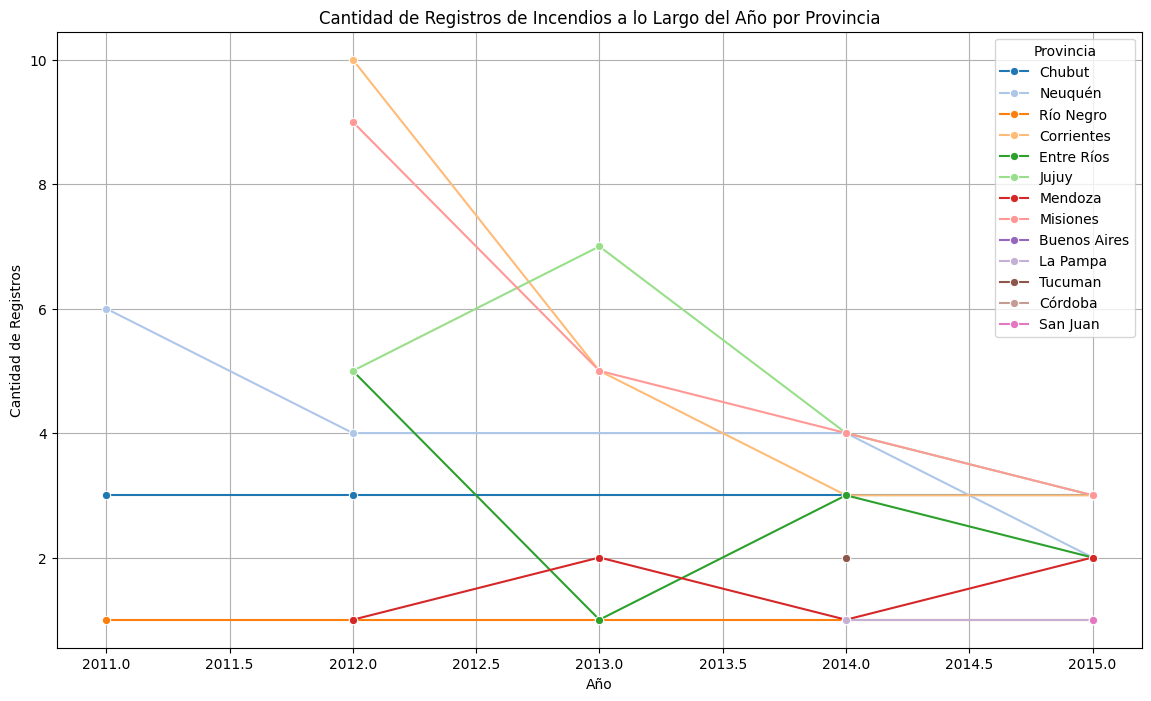

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que las columnas relevantes sean del tipo correcto
data_forestal['año_inicial'] = data_forestal['año_inicial'].astype(int)

# Agrupar los datos por año y provincia, y contar la cantidad de registros
incendios_por_año = data_forestal.groupby(['año_inicial', 'provincia']).size().reset_index(name='cantidad_registros')

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=incendios_por_año, x='año_inicial', y='cantidad_registros', hue='provincia', marker='o', palette='tab20' )

# Personalizar el gráfico
plt.title('Cantidad de Registros de Incendios a lo Largo del Año por Provincia')
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')
plt.legend(title='Provincia')
plt.grid(True)

# Mostrar el gráfico
plt.show()


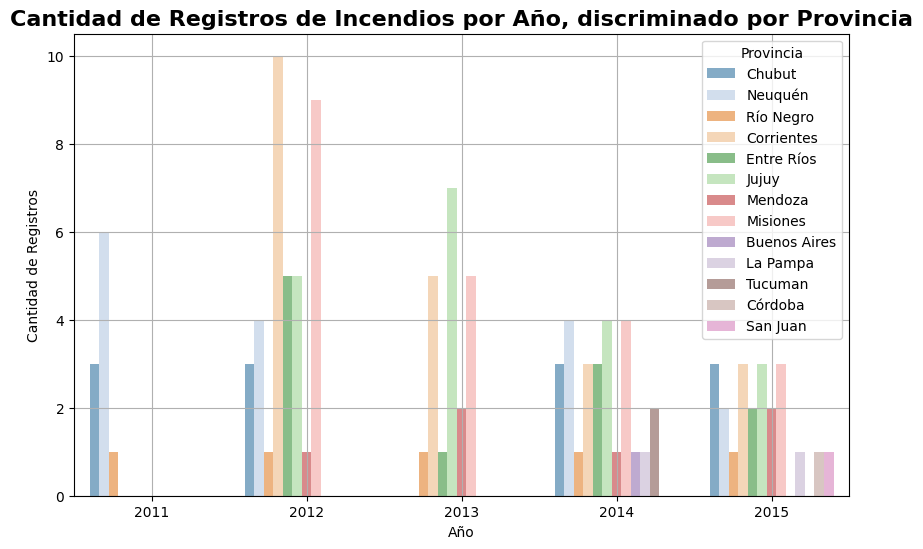

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que las columnas relevantes sean del tipo correcto
data_forestal['año_inicial'] = data_forestal['año_inicial'].astype(int)

# Agrupar los datos por año y provincia, y contar la cantidad de registros
incendios_por_año = data_forestal.groupby(['año_inicial', 'provincia']).size().reset_index(name='cantidad_registros')

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=incendios_por_año, x='año_inicial', y='cantidad_registros', hue='provincia', palette='tab20', alpha=0.6)

# Personalizar el gráfico
plt.title('Cantidad de Registros de Incendios por Año, discriminado por Provincia', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')
plt.legend(title='Provincia')
plt.grid(True)

# Mostrar el gráfico
plt.show()
